<a href="https://colab.research.google.com/github/nahor8011/Customer-Churn-Prediction/blob/main/Central%20Limit%20Theorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
data_link = 'https://drive.google.com/uc?export=download&id=1OsX1C1awZKqstYnuSKiKB0ynnYFWHSNI'
data= pd.read_csv(data_link)
data.head()
# https://drive.google.com/file/d/1OsX1C1awZKqstYnuSKiKB0ynnYFWHSNI/view?usp=share_link

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [3]:
data.head(10)

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03
5,7,1923,42,Female,0.0,self_employed,1096.0,2,1666,15202.20,...,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0,2019-11-01
6,8,2048,72,Male,0.0,retired,1020.0,1,1,7006.93,...,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0,2019-09-24
7,9,2009,46,Male,0.0,self_employed,623.0,2,317,10096.58,...,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0,2019-07-12
8,10,2053,31,Male,0.0,salaried,1096.0,2,4110,1355.86,...,1702.44,1126.13,714.51,121.09,714.51,359.44,1183.45,1857.42,0,2019-12-12
9,11,2295,40,Male,3.0,self_employed,1020.0,2,38,4957.95,...,2168.53,1864.33,6912.29,4206.13,1887.30,1348.85,1823.16,2416.69,0,2019-12-31


In [4]:
population = data['vintage']

In [5]:
population = pd.DataFrame(population)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f600d22fbb0>]],
      dtype=object)

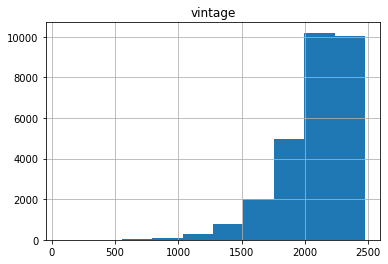

In [6]:
population.hist(bins=10)

In [7]:
population['vintage'].mean()

2091.1441054189277

In [8]:
# Create a List
sampled_means = []

# For 1000 times,
for i in range(0,1000):
  # Taking a Random sample of 100 rows from the population, take the mean of those rows, append to sampled_means
  sampled_means.append(population.sample(n=100).mean().values[0]) 

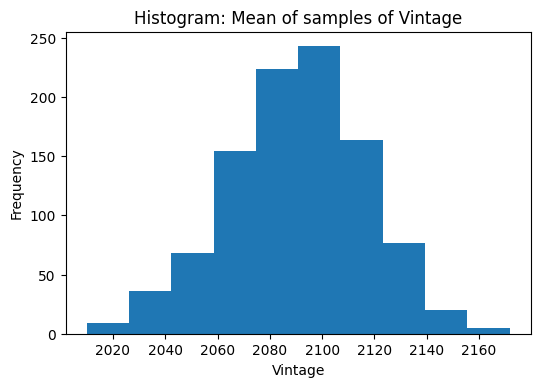

In [9]:
# Plotting Histogram

plt.figure(dpi = 100)
plt.hist(sampled_means)
plt.xlabel("Vintage")
plt.ylabel("Frequency")
plt.title("Histogram: Mean of samples of Vintage")
plt.show()

**1000 Samples of 100 datapoints were taken**

**Mean of the Random samples actually follow the Normal Distribution**

**Central Limit Theorem can be verified by using KDE as well**

In [10]:
# View the Mean of the Sampled_Means
pd.Series(sampled_means).mean()

2090.4957299999996

In [11]:
# Subtract Mean Sample Mean From True Population Mean:

error = population['vintage'].mean() - pd.Series(sampled_means).mean()

# Print
print('The Mean Sample Mean is only %f different the True Population mean!' % error)

The Mean Sample Mean is only 0.648375 different the True Population mean!
